In [1]:
import random
import networkx as nx
import matplotlib.pyplot as  plt
import math
import pandas as pd
import numpy as np

In [2]:
def gen_ER(N,ave_d):
    p = ave_d/(N-1)
    G = nx.Graph()
    G.add_nodes_from(range(100))
    for i in range(N):
        for j in range(i):
            rand = random.random()
            if rand < p:
                G.add_edge(i, j)
                
    return G


def gen_pos(G,n):
    xaxis=[x%n for x in G.nodes()]
    yaxis=[n-1-x//n for x in G.nodes()]
    pos={}
    for i in range(n**2):
        pos[i]=(xaxis[i],yaxis[i])
        
    return pos

def show_graph(G,seed=1):
    plt.figure(figsize=(8,6))
    pos=gen_pos(G,int(n))
    #pos=nx.kamada_kawai_layout(G)
    #pos=nx.shell_layout(G)
    #pos=nx.random_layout(G)
    nx.draw(G,pos=pos,with_labels=True,node_color='brown',node_size=300,edge_color='grey',font_color='white',font_size=11)
    plt.title("ER Network of 100 nodes")
    plt.savefig('ER Network of 100 nodes.png')
    plt.show()
    return G

def cal_ave_deg(G):
    degree_sum=0
    for deg in G.degree():
        degree_sum += deg[1]
        ave_degree=degree_sum/N
        
    return ave_degree

In [3]:
def show_cluster_graph(G):
    partition = community.community_louvain.best_partition(G)
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(G)
    count = 0.
    plt.figure(figsize=(10,8))
    for com in set(partition.values()) :
        count = count + 1.
        cmap=['darkgrey','darkorchid','royalblue','c','olivedrab','lightgreen','gold','orange','firebrick','lightcoral','hotpink']
        #如果图中有11种以上不同size的component,需要增加cmap中的颜色数量，或者利用同一颜色的不同深浅度表示
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]      
        #print(list_nodes)
        nx.draw_networkx_nodes(G,pos,list_nodes, node_size = 65, node_color = cmap[len(list_nodes)-1],label=True)
        #nx.draw_networkx_nodes(G,pos,list_nodes, node_size = 65, node_color = str(count / size),label=True)
        nx.draw_networkx_edges(G,pos, edge_color='grey')
        #print(count)
    plt.title("ER Network of 100 nodes (by component)")
    plt.savefig('ER Network of 100 nodes (by component).png')
    plt.show()


def simu_ps(G,N,M):
    #print("平均结点度：", cal_ave_deg(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    #print(Gcc[0])
    size=[0]*M
    for j in Gcc:
        s=len(j)
        size[s-1]=size[s-1]+s/N
    return size

In [4]:
#plot by component
N=100
ave_d=0.5
G=gen_ER(N,ave_d)
show_cluster_graph(G)
#多画几次挑个合适的图

NameError: name 'community' is not defined

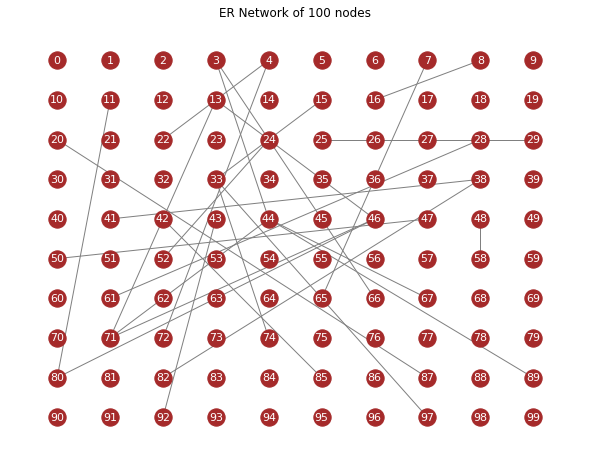

结点度: [(0, 0), (1, 0), (2, 0), (3, 2), (4, 2), (5, 0), (6, 0), (7, 1), (8, 1), (9, 0), (10, 0), (11, 1), (12, 0), (13, 2), (14, 0), (15, 1), (16, 1), (17, 0), (18, 0), (19, 0), (20, 1), (21, 0), (22, 1), (23, 0), (24, 1), (25, 1), (26, 0), (27, 0), (28, 1), (29, 1), (30, 0), (31, 0), (32, 0), (33, 3), (34, 0), (35, 0), (36, 2), (37, 0), (38, 2), (39, 0), (40, 0), (41, 1), (42, 1), (43, 1), (44, 4), (45, 0), (46, 3), (47, 1), (48, 1), (49, 0), (50, 1), (51, 0), (52, 1), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 1), (59, 0), (60, 0), (61, 1), (62, 0), (63, 0), (64, 0), (65, 1), (66, 1), (67, 1), (68, 0), (69, 0), (70, 0), (71, 3), (72, 1), (73, 0), (74, 1), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 2), (81, 0), (82, 1), (83, 0), (84, 0), (85, 1), (86, 0), (87, 1), (88, 0), (89, 1), (90, 0), (91, 0), (92, 1), (93, 0), (94, 0), (95, 0), (96, 0), (97, 1), (98, 0), (99, 0)]
平均结点度： 0.56


In [5]:
#plot ER networks
n=math.sqrt(N)
#pos=gen_pos(G,int(n))
show_graph(G,seed=1)
#graphs=list(nx.connected_component_subgraphs(G))
print("结点度:",G.degree())
print("平均结点度：", cal_ave_deg(G))

In [6]:
#simulated Ps
N=100
ave_d=0.5
M=20
psum=[0]*M
x=0
while x<200:
    G=gen_ER(N,ave_d)
    avedeg=cal_ave_deg(G)
    if avedeg==ave_d:
        sim_ps=simu_ps(G,N,M)
        #print(s_ps)
        for i in range(M):
            psum[i]=psum[i]+sim_ps[i]
        #print(p)
        x += 1
        #print(x)

sim_ps=[pitem/x for pitem in psum]
sim_ps

[0.6052000000000001,
 0.18340000000000012,
 0.0883499999999999,
 0.04859999999999995,
 0.02599999999999996,
 0.015600000000000011,
 0.011200000000000005,
 0.009200000000000003,
 0.005399999999999999,
 0.0015000000000000002,
 0.0027500000000000003,
 0.0006,
 0.0,
 0.0014000000000000002,
 0.0,
 0.0008,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
#numerical Ps
#calculate H0
import cmath
import math
N=100
ave_d=0.5
M=20
p=ave_d/N
num_ps=[0]*(M+1)
lim=1000
for s in range(1,M+1):
    func=0
    for n in range(lim):
        d=2*math.pi*n/lim
        point=complex(math.cos(d),math.sin(d))
        ustar=0.5
        u=0
        while abs(u-ustar)>0.00000001:
            u=ustar
            ustar=point*pow(1-p+p*u,N-2)
        real=round(ustar.real,6)
        imag=round(ustar.imag,6)
        ustar=complex(real,imag)
        #print(ustar)
        H0=point*pow(1-p+p*ustar,N-1)
        func=func+H0/complex(math.cos(d*s),math.sin(d*s))
        #print(func)
    
    num_ps[s]=abs(func)/lim
num_ps.remove(num_ps[0])
num_ps

[0.6088145077817959,
 0.18532286639932755,
 0.08376357214676804,
 0.044756725868446076,
 0.026246361067067913,
 0.016332477751402594,
 0.010590505417211737,
 0.007078145470723086,
 0.004841562897620323,
 0.0033729163027413135,
 0.0023849120471653258,
 0.0017071495886643165,
 0.0012346745352368508,
 0.0009008486448858019,
 0.0006623001063654263,
 0.0004901393540709124,
 0.00036485502406694926,
 0.00027299049707461164,
 0.0002051972643324893,
 0.0001548818588404165]

In [8]:
M=20
error=[0]*M
for i in range(M):
    error[i]=sim_ps[i]-num_ps[i]

In [9]:
#compare simulated Ps and numerical Ps
result=pd.DataFrame({'Simulation Ps':sim_ps,'Numerical Ps':num_ps,'error':error})
print(result)
result.to_csv("result_Ps.csv",index=False)

    Simulation Ps  Numerical Ps     error
0         0.60520      0.608815 -0.003615
1         0.18340      0.185323 -0.001923
2         0.08835      0.083764  0.004586
3         0.04860      0.044757  0.003843
4         0.02600      0.026246 -0.000246
5         0.01560      0.016332 -0.000732
6         0.01120      0.010591  0.000609
7         0.00920      0.007078  0.002122
8         0.00540      0.004842  0.000558
9         0.00150      0.003373 -0.001873
10        0.00275      0.002385  0.000365
11        0.00060      0.001707 -0.001107
12        0.00000      0.001235 -0.001235
13        0.00140      0.000901  0.000499
14        0.00000      0.000662 -0.000662
15        0.00080      0.000490  0.000310
16        0.00000      0.000365 -0.000365
17        0.00000      0.000273 -0.000273
18        0.00000      0.000205 -0.000205
19        0.00000      0.000155 -0.000155
